Таблица Метод Эйлера и уточнение Ричардсона
x       y_math      y^h         y^{h/2}     y_rev       y_rev - y_math
0.0    0.000000    0.000000    0.000000    0.000000    0.000000000000000
0.0    0.001000    0.001000    0.001000    0.001000    0.000000000314709
0.0    0.002000    0.002000    0.002000    0.002000    0.000000000627119
0.0    0.003000    0.003000    0.003000    0.003000    0.000000000937300
0.0    0.004000    0.004000    0.004000    0.004000    0.000000001245797
0.0    0.005000    0.005000    0.005000    0.005000    0.000000001552755
0.0    0.006000    0.006000    0.006000    0.006000    0.000000001858042
0.0    0.007000    0.007000    0.007000    0.007000    0.000000002161379
0.0    0.007999    0.007999    0.007999    0.007999    0.000000002462461
0.0    0.008999    0.008999    0.008999    0.008999    0.000000002761087
0.0    0.009999    0.009999    0.009999    0.009999    0.000000003057290
0.0    0.010998    0.010999    0.010998    0.010998    0.000000003351453
0.0    0.

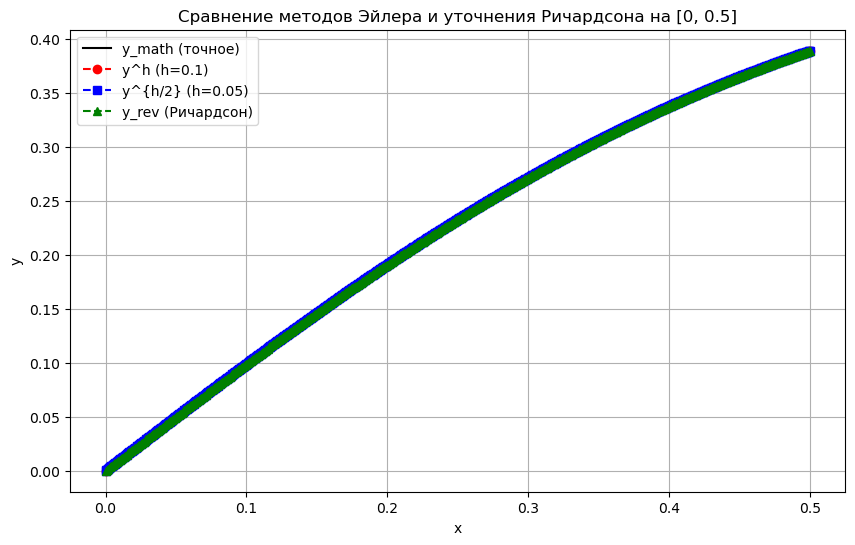


Таблица 5: Сравнение методов на [0.5, 1]
x     y_math     y_RK     y_Ad_ex     y_Ad_in     y_math - y_RK     y_math - y_Ad_ex     y_math - y_Ad_in
0.5   0.388723   0.388723   0.388723   0.388723   0.000000000000213          0.000000000000143          0.000000000000176
0.5   0.389164   0.389164   0.389164   0.389164   0.000000000000176          0.000000000000106          0.000000000000138
0.5   0.389603   0.389603   0.389603   0.389603   0.000000000000051          0.000000000000121          0.000000000000088
0.5   0.390041   0.390041   0.390041   0.390041   0.000000000000316          0.000000000000386          0.000000000000353
0.5   0.390477   0.390477   0.390477   0.390477   0.000000000000393          0.000000000000463          0.000000000000431
0.5   0.390913   0.390913   0.390913   0.390913   0.000000000000489          0.000000000000559          0.000000000000526
0.5   0.391346   0.391346   0.391346   0.391346   0.000000000000476          0.000000000000546          0.00000000000051

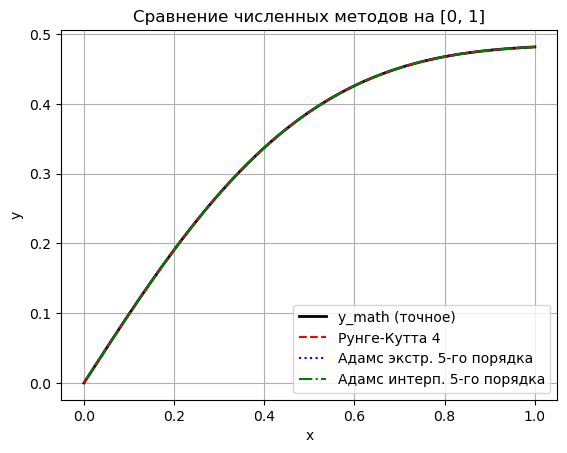

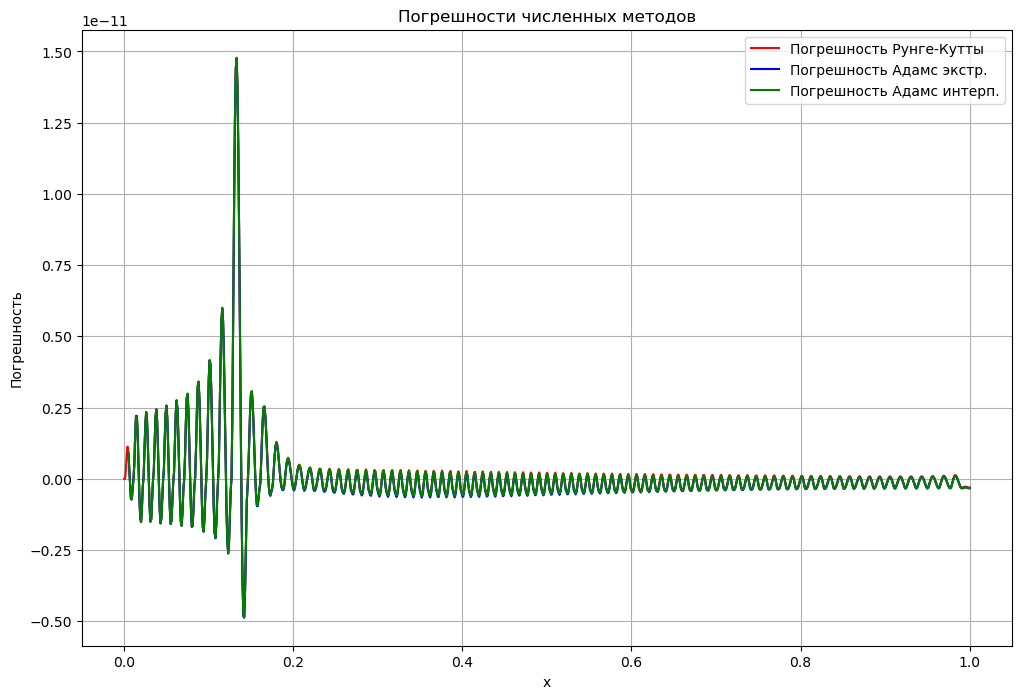

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import math

# Исходная задача
def f(x, y):
    return np.cos(1.75 * x + y) + 1.25 * (x - y)

x0, y0 = 0.0, 0.0
b = 1.0
h = 0.001
N = int((b - x0) / h) + 1
x_points = np.linspace(x0, b, N)

# Точное решение (численное, с высокой точностью) 
sol = solve_ivp(f, [x0, b], [y0], method='RK45', t_eval=x_points, rtol=1e-12, atol=1e-12)
y_math = sol.y[0]

# Метод Эйлера 
def euler_method(f, x0, y0, b, h):
    N = int((b - x0) / h) + 1
    x = np.linspace(x0, b, N)
    y = np.zeros(N)
    y[0] = y0
    for i in range(N - 1):
        y[i + 1] = y[i] + h * f(x[i], y[i])
    return x, y

#  шаг h
x_euler_h, y_euler_h = euler_method(f, x0, y0, 0.5, h)
#  шаг h/2
x_euler_h2, y_euler_h2 = euler_method(f, x0, y0, 0.5, h/2)

# уточнение по Ричардсону (экстраполяция
s = 1  # порядок метода Эйлера
y_rev = y_euler_h2[::2] + (y_euler_h2[::2] - y_euler_h) / (2**s - 1)

# = Таблица 4: Эйлер + Ричардсон 
print("Таблица Метод Эйлера и уточнение Ричардсона")
print("x       y_math      y^h         y^{h/2}     y_rev       y_rev - y_math")
for i, x in enumerate(x_euler_h):
    idx_math = np.where(np.abs(x_points - x) < 1e-10)[0][0]
    print(f"{x:.1f}    {y_math[idx_math]:.6f}    {y_euler_h[i]:.6f}    "
          f"{y_euler_h2[2*i]:.6f}    {y_rev[i]:.6f}    {abs(y_rev[i] - y_math[idx_math]):.15f}")

#  Графики для Эйлера 
plt.figure(figsize=(10, 6))
plt.plot(x_points[:6], y_math[:6], 'k-', label='y_math (точное)')
plt.plot(x_euler_h, y_euler_h, 'ro--', label='y^h (h=0.1)')
plt.plot(x_euler_h2, y_euler_h2, 'bs--', label='y^{h/2} (h=0.05)')
plt.plot(x_euler_h, y_rev, 'g^--', label='y_rev (Ричардсон)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение методов Эйлера и уточнения Ричардсона на [0, 0.5]')
plt.legend()
plt.grid()
plt.show()

#Метод Рунге-Кутты 4-го порядка с контролем точности
def runge_kutta_4(f, x0, y0, b, h, eps=1e-5):
    N = int((b - x0) / h) + 1
    x = np.linspace(x0, b, N)
    y = np.zeros(N)
    y[0] = y0
    for i in range(N - 1):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)
        y[i + 1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return x, y

x_rk, y_rk = runge_kutta_4(f, x0, y0, b, h, eps=1e-5)

#  Экстраполяционный метод Адамса 5-го порядка
def adams_extrapolation_5(f, x, y_start, h):
    # y_start — начальные 5 значений (индексы 0..4)
    # x — массив точек, где x[0]..x[4] уже известны
    n = len(x)
    y = np.zeros(n)
    y[:5] = y_start
    q = h * f(x[:5], y[:5])
    
    # Коэффициенты для экстраполяционного метода Адамса 5-го порядка (k=4)
    coeff = [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
    
    for i in range(4, n-1):
        y[i+1] = y[i] + np.dot(coeff, q[i::-1][:5])
        q = np.append(q, h * f(x[i+1], y[i+1]))
    return y

# Начальные точки методом Рунге-Кутты
x_adams = x_points
y_start = y_rk[:5]  # первые 5 точек Рунге-Кутты
y_ad_ex = adams_extrapolation_5(f, x_adams, y_start, h)

#  Интерполяционный метод Адамса 5-го порядка
def adams_interpolation_5(f, x, y_start, h, eps=1e-6, max_iter=10):
    n = len(x)
    y = np.zeros(n)
    y[:5] = y_start
    q = h * f(x[:5], y[:5])
    
    # Коэффициенты для интерполяционного метода Адамса 5-го порядка (k=4)
    coeff = [251/720, 646/720, -264/720, 106/720, -19/720]
    
    for i in range(4, n-1):
        # Нулевое приближение — экстраполяционный метод
        y0 = y[i] + (1901*q[i] - 2774*q[i-1] + 2616*q[i-2] - 1274*q[i-3] + 251*q[i-4]) / 720
        for _ in range(max_iter):
            q_new = h * f(x[i+1], y0)
            y_new = y[i] + (251*q_new + 646*q[i] - 264*q[i-1] + 106*q[i-2] - 19*q[i-3]) / 720
            if abs(y_new - y0) < eps:
                break
            y0 = y_new
        y[i+1] = y_new
        q = np.append(q, h * f(x[i+1], y[i+1]))
    return y

y_ad_in = adams_interpolation_5(f, x_adams, y_start, h, eps=1e-6)

#Таблица Сравнение методов
print("\nТаблица 5: Сравнение методов на [0.5, 1]")
print("x     y_math     y_RK     y_Ad_ex     y_Ad_in     y_math - y_RK     y_math - y_Ad_ex     y_math - y_Ad_in")
for i in range(len(x_points)):
    if x_points[i] >= 0.5:
        print(f"{x_points[i]:.1f}   {y_math[i]:.6f}   "
              f"{y_rk[i]:.6f}   {(y_ad_ex[i]):.6f}   {(y_ad_in[i]):.6f}   "
              f"{abs(y_math[i] - y_rk[i]):.15f}          {abs(y_math[i] - y_ad_ex[i]):.15f}          {abs(y_math[i] - y_ad_in[i]):.15f}")

# Графики всех методов
plt.plot(x_points, y_math, 'k-', linewidth=2, label='y_math (точное)')
plt.plot(x_rk, y_rk, 'r--', label='Рунге-Кутта 4')
plt.plot(x_adams[5:], y_ad_ex[5:], 'b:', label='Адамс экстр. 5-го порядка')
plt.plot(x_adams[5:], y_ad_in[5:], 'g-.', label='Адамс интерп. 5-го порядка')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Сравнение численных методов на [0, 1]')
plt.legend()
plt.grid()
plt.show()

# Графики погрешностей
plt.figure(figsize=(12, 8))
plt.plot(x_points, y_math - y_rk, 'r-', label='Погрешность Рунге-Кутты')
plt.plot(x_points[5:], y_math[5:] - y_ad_ex[5:], 'b-', label='Погрешность Адамс экстр.')
plt.plot(x_points[5:], y_math[5:] - y_ad_in[5:], 'g-', label='Погрешность Адамс интерп.')
plt.xlabel('x')
plt.ylabel('Погрешность')
plt.title('Погрешности численных методов')
plt.legend()
plt.grid()
plt.show()